In [158]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [159]:
%matplotlib notebook
S0 = 10000
r = np.log(0.97)
sigma = 0.1 / np.sqrt(12)
lamb = 1 / 6 / 12
mu = - 1.0
delta = 0.1
T = 10.0

In [160]:
M = 10 * 12
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M+1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = (
            S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                    + (np.exp(mu + delta * sn2[t]) - 1)
                    * poi[t]
        ))
    S[t] = np.maximum(S[t], 0)

<IPython.core.display.Javascript object>


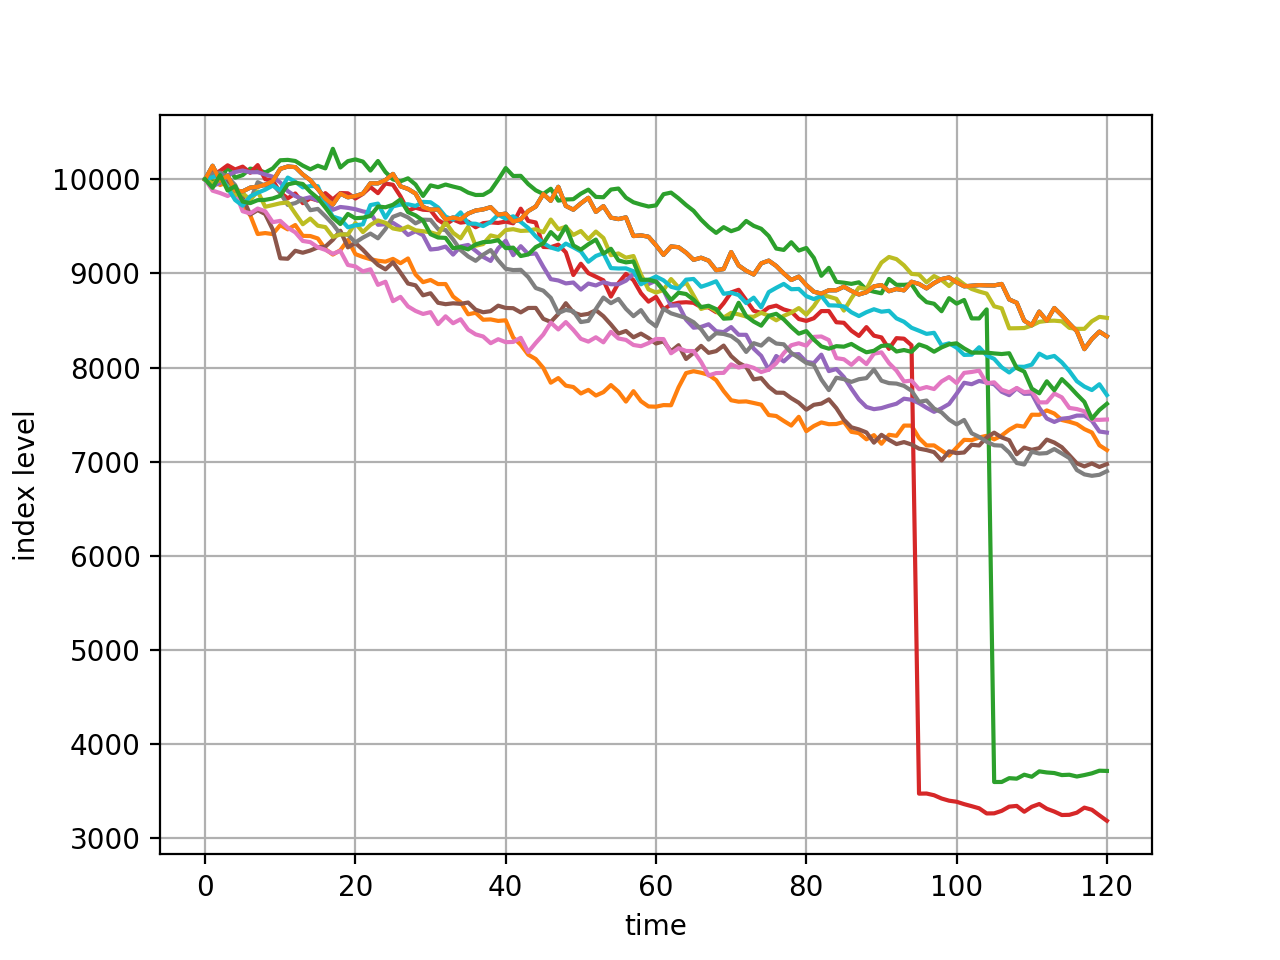

In [161]:
plt.plot(S[:, 20:30], lw = 1.5)
plt.xlabel("time")
plt.ylabel("index level")
plt.grid(True)

In [167]:
simulated_paths = np.zeros([M+1, I])
simulated_paths[0] = S0
for i in range(M):
    simulated_paths[i+1, :] = simulated_paths[i]*np.exp((r
                           - sigma**2/2)*dt + sigma*np.sqrt(dt) \
                           * sn1[i] + mu*poi[i] \
                           + np.sqrt(delta**2) * np.sqrt(poi[i]) \
                           * sn2[i])

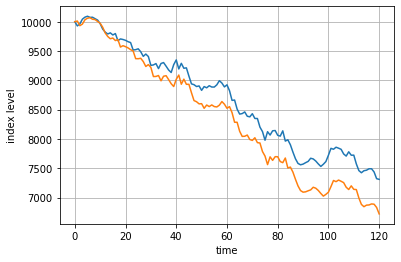

In [174]:
%matplotlib inline
plt.plot(S[:, 24], lw = 1.5)
plt.plot(simulated_paths[:, 24], lw = 1.5)
plt.xlabel("time")
plt.ylabel("index level")
plt.grid(True)
plt.show()